## Crack Spread Arbitrage

In [20]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

In [9]:
cl_f = "CL=F" #Crude Oil
rb_f = "RB=F" #Gasoline
ho_f = "HO=F" #Heated Oil"
refiner = "PSX" #Refiner ticker

start = "2021-01-01"
end = "2024-01-01"

window = 22

data = yf. download([cl_f, rb_f, ho_f, refiner], start=start,end=end)["Adj Close"]
data

[*********************100%%**********************]  4 of 4 completed


Ticker,CL=F,HO=F,PSX,RB=F
Date,,,,
2021-01-04,47.619999,1.4620,61.148327,1.3729
2021-01-05,49.930000,1.5189,62.784672,1.4521
2021-01-06,50.630001,1.5287,62.320889,1.4750
2021-01-07,50.830002,1.5381,62.880928,1.4827
2021-01-08,52.240002,1.5795,61.874611,1.5423
...,...,...,...,...
2023-12-22,73.559998,2.6612,133.098312,2.1301
2023-12-26,75.570000,2.6688,134.746399,2.1583
2023-12-27,74.110001,2.6239,133.733719,2.1550


In [27]:
# Construct the Crack spread

data["crack"] = (3 * data[cl_f] - 2 * data[rb_f] - data[ho_f])
data[ "spread"] = (data.crack - data[refiner])
data["returns"] = data.spread.apply(np. log).diff(1)

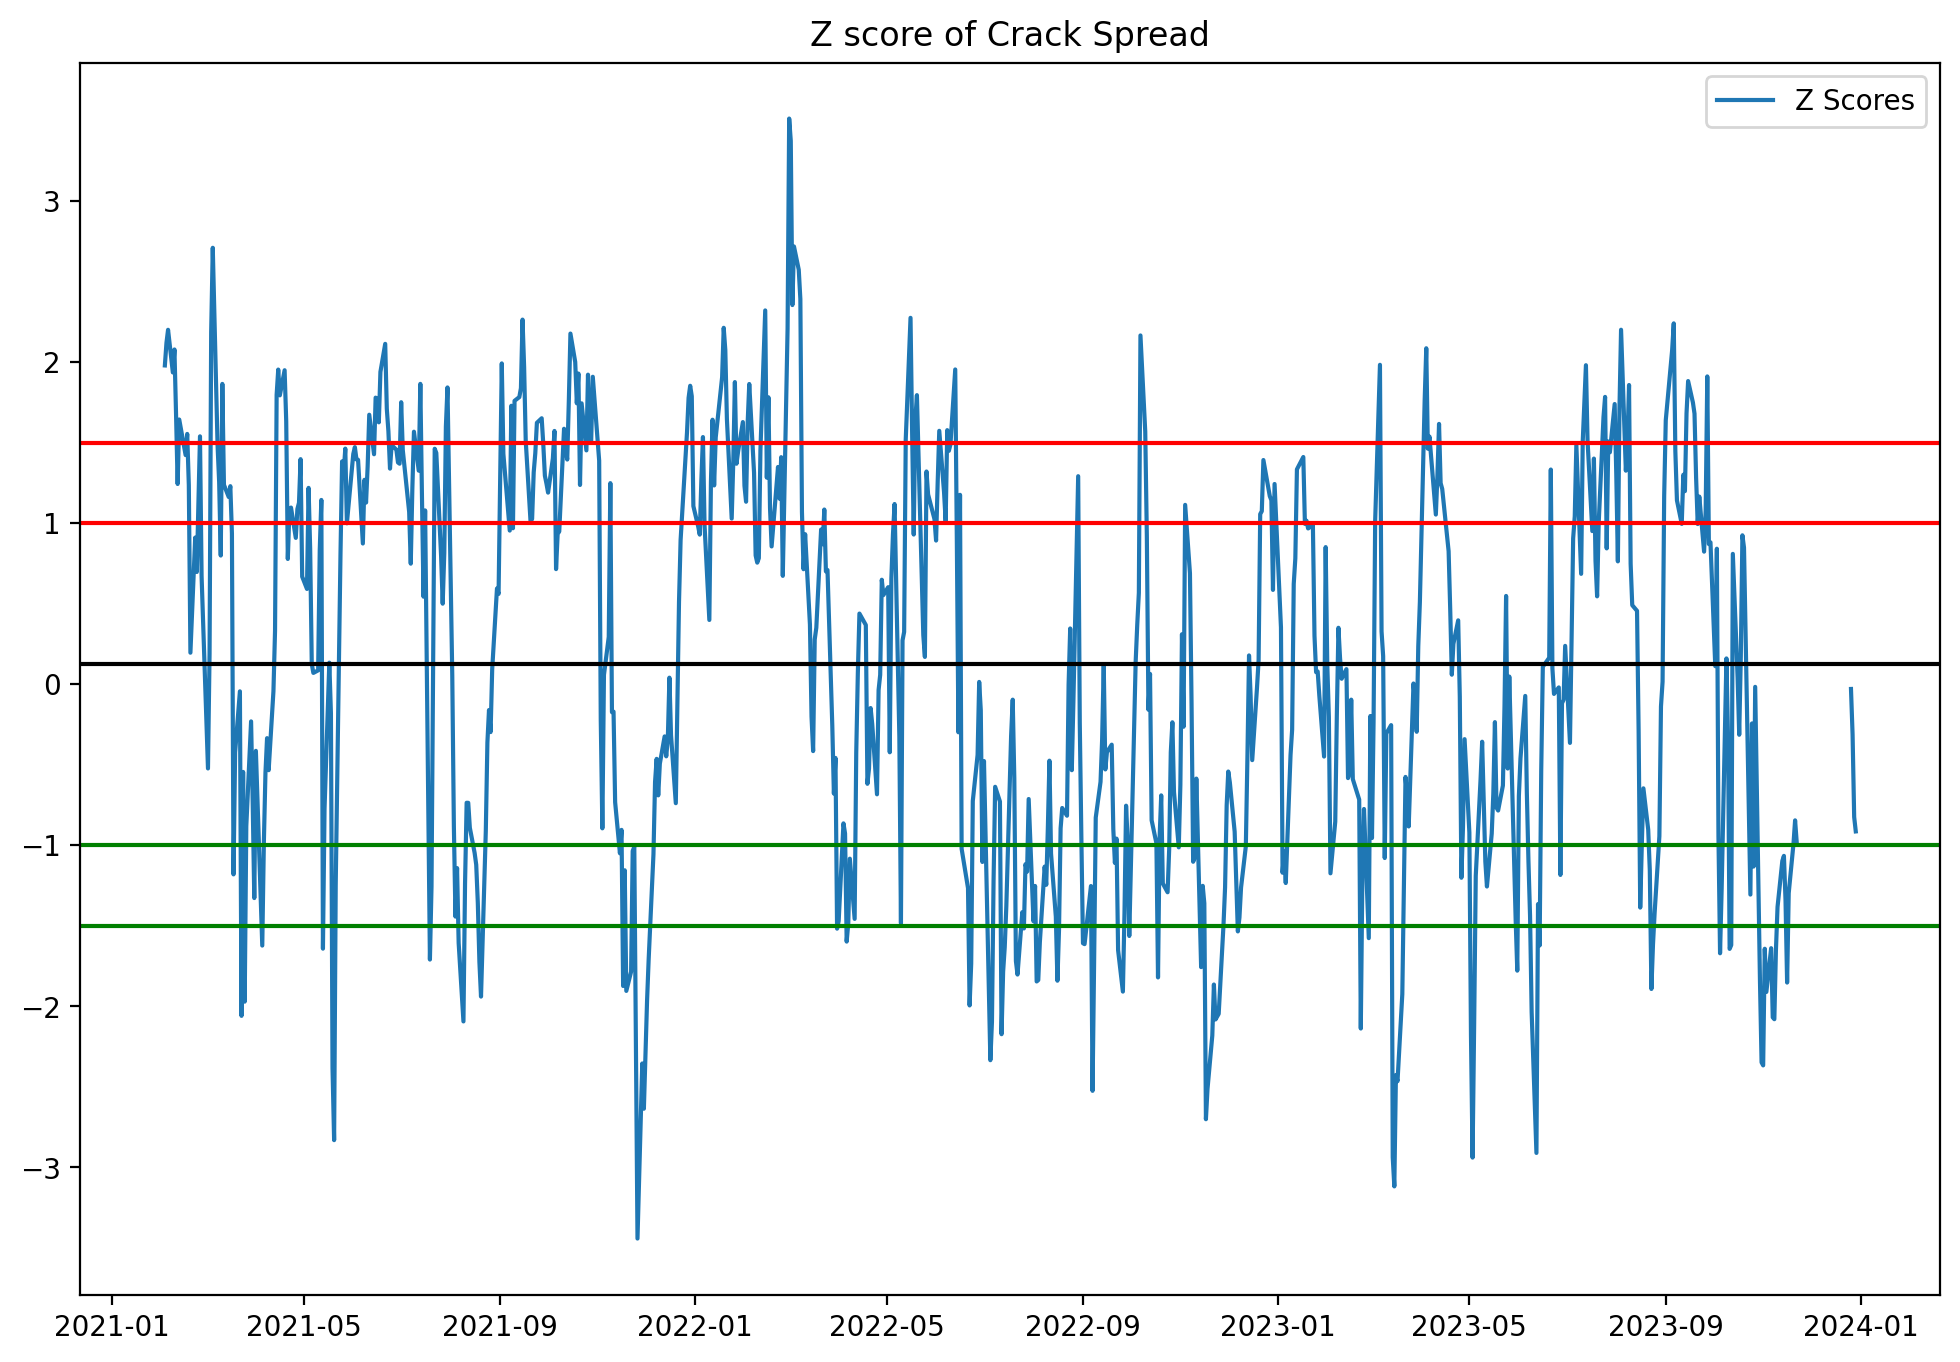

In [22]:
# Calculating and plot Z score

data["z"] = (data.spread - data.spread.rolling(window=window).mean()) / data.spread.rolling(window=window).std( )
data["position"] = np.select([data.z < -1.5, data.z > 1.5],[1, -1], default=0)

figure(figsize=(12, 8), dpi=200)
df_zscore = data["z"]
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.5, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.5, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Crack Spread')
plt.show()

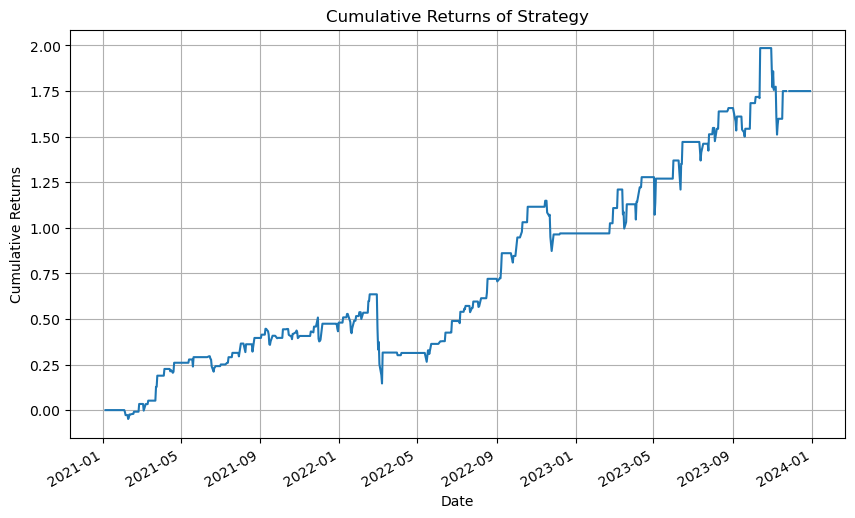

Date
2021-01-04         NaN
2021-01-05    0.000000
2021-01-06    0.000000
2021-01-07    0.000000
2021-01-08    0.000000
                ...   
2023-12-22    1.749055
2023-12-26    1.749055
2023-12-27    1.749055
2023-12-28    1.749055
2023-12-29    1.749055
Length: 754, dtype: float64

In [28]:
strategy_returns = data.position.shift(1) * data.returns

cumulative_returns = (1 + strategy_returns).cumprod() - 1
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns of Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

cumulative_returns

In [1]:
# Strategy created by PyQuant - Modified by Edoardo Alberto Donolato